# 
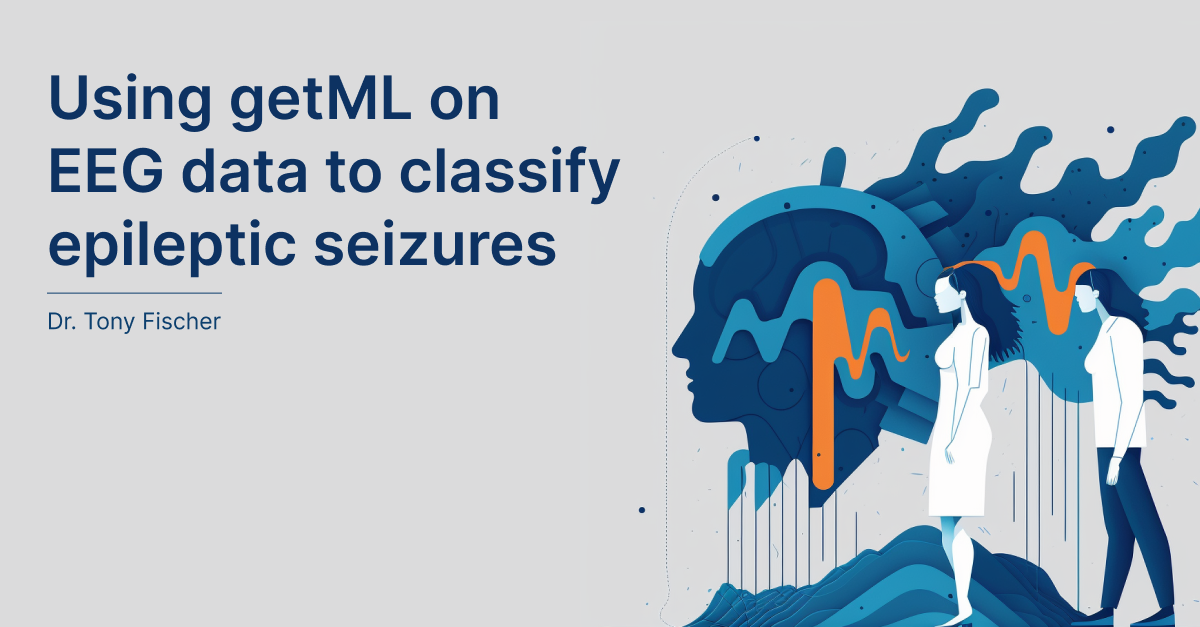

## Introduction

### A Primer on Time Series

Wikipedia defines a time series as follows:

In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.

The first sentence defines a fundamental feature of time series: your data can be ordered in time. This does not necessitate the existence of a specific time stamp. It only means that data points should be in chronological order.

Consider the following three examples. All of them are time series. The first example shows force measurements on a robot's arm. We do not know the specific time and date when these measurements were taken. But what we do know is that the data points are indexed according to chronological order. The second example shows hourly traffic volume on interstate 94 (a highway in the United States of America) in the first week of April 2016. This data has an exact date and time when the measurements were taken. The third example is a bio-signal, a recording of an EEG signal of human brain activity. For this kind of data, a specific time stamp can be useful, for example sleep data over longer time periods such as months, but commonly is not necessary for short term bio-signals such as EEG readings or movement data.

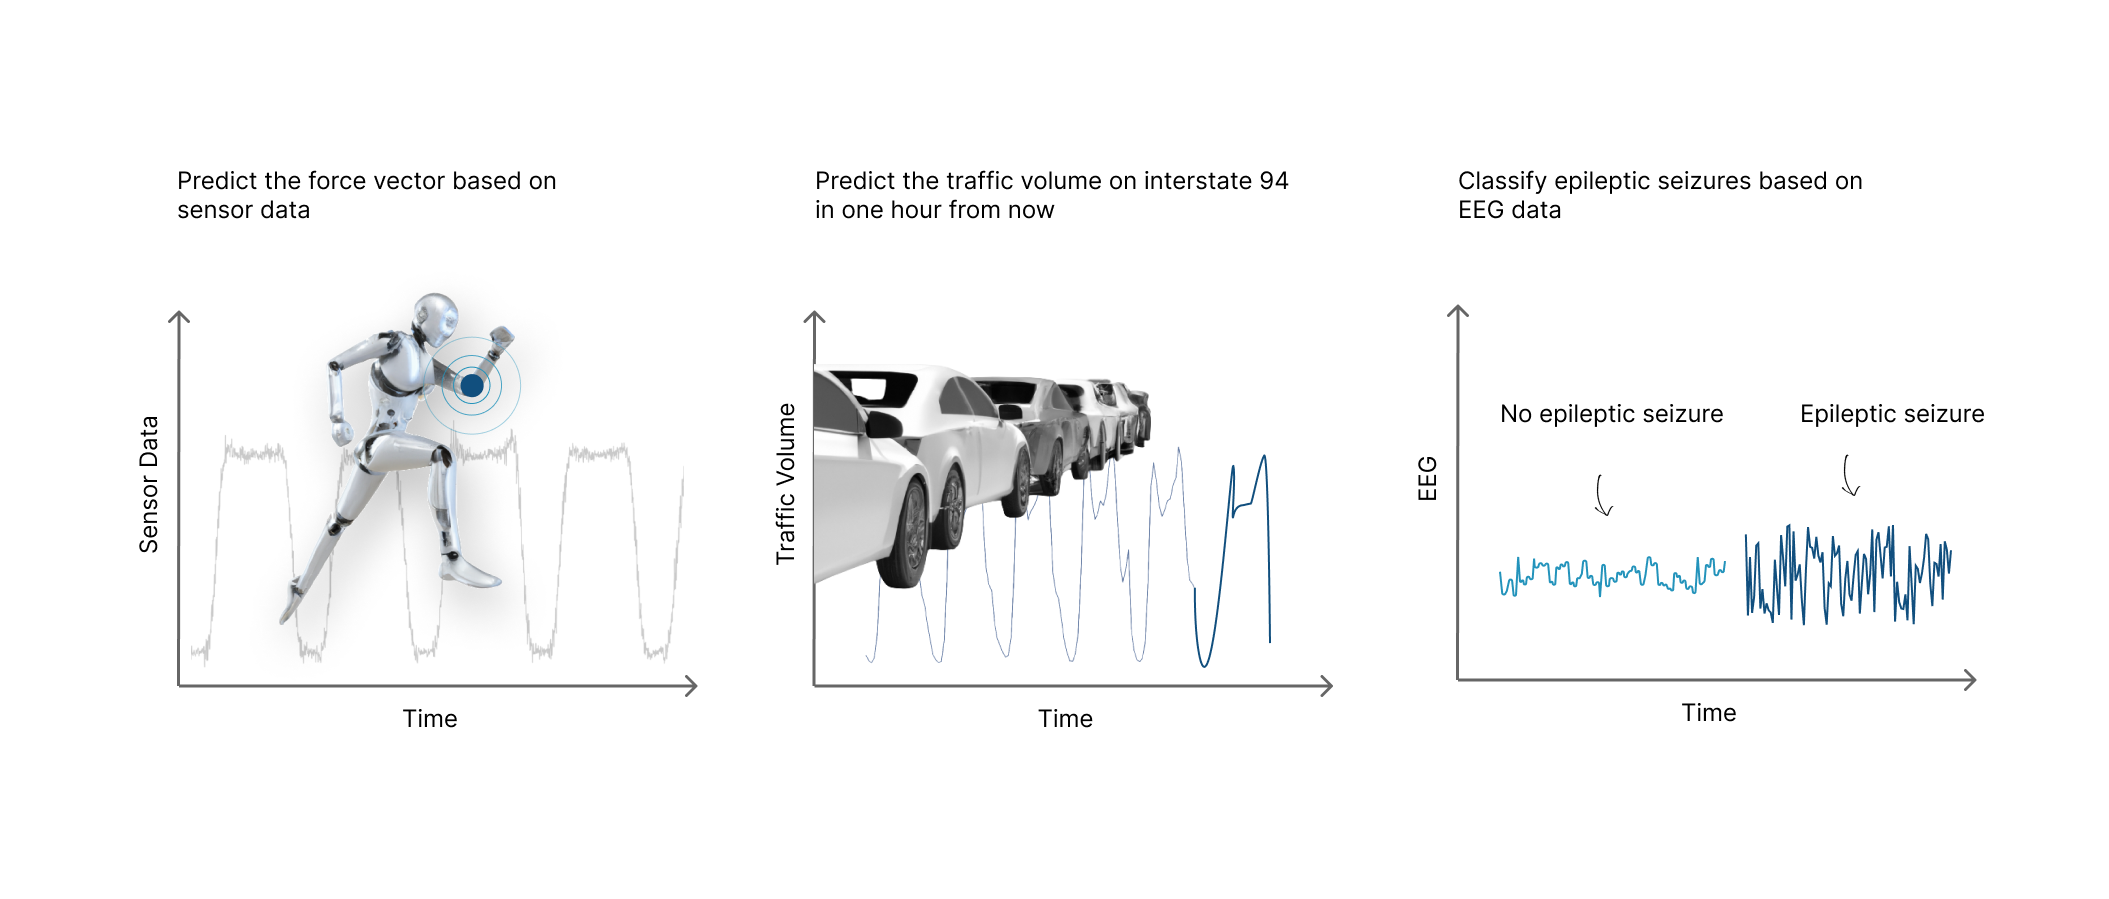

The second sentence in Wikipedia's definition says that points in time are most commonly equally spaced. This in fact holds true for most time series data. We know for a fact that traffic volume was measured once every hour. Although we do not have a time stamp for the robot arm data, we can assume that the data recording sensor measured in equally spaced time intervals. 

As a matter of fact, even these equidistant time intervals might be an assumption in data sets like the above examples, as all sensors physically record data points with some form of timely variance due to multiple reasons such as sensor or data saving lags and so on. Additionally, there might be an inherent variance; for example a person never sleeps at exactly the same time every day. However, in many real-world data sets you will find that the assumption of equally spaced data points in time is violated and you will have to deal with that.

### Time Series Prediction Tasks

There are several kinds of time series problems, but they can be roughly subdivided into two kinds: *Forecasts* and *Nowcasts*.

- A *forecast* tries to predict the future. For instance, when dealing with the Interstate 94 data, you will most likely want to predict the traffic volume in one hour from now or one week from now. This time period is often called the *forecast horizon*.

- A *nowcast* tries to predict another time series or class-label based on some time series. For instance, when confronted with the robot data, you might want to predict the force vector based on other sensor data. This is useful when other sensor data are easier to measure than the force vector. On the other hand, a very common task for bio-signals is classifying some state based on these signals, such as sleep quality or epileptic seizure occurance.

A very interesting question is also whether you are allowed to use lagged targets. For instance, if you want to predict the traffic volume for the next hour, are you allowed to use the traffic volume for the last three hours? In this case, probably yes, but if you want to do a nowcast on the force vector of the robot's arm, probably no, because the entire idea is that measuring the force vector is difficult and therefore we cannot assume that we have the force vector data of the recent past when we are making a prediction. This question is also very relevant for classification tasks, as you face the question of how far in the past data is relevant to classifying a specific time point or interval. For example, in sleep data classification, events that occurred several days, weeks, or even months in the past might have an influence, while an epileptic seizure might be detectable in the short term.

### Why We Need Feature Engineering

The next question is: why do we need feature engineering in the first place? Isn't machine learning supposed to magically extract the information it needs from the data? Unfortunately, it is not quite that simple. Standard machine learning algorithms require the data to be presented in a *flat table*. 

We say *standard machine learning* and that means that there are exceptions. *Deep learning* can automatically extract features from unstructured data like images, text and speech. On the other hand, *relational learning* can automatically extract features from structured relational data.

In the absence of these two approaches, we have to manually engineer features. This involves interactions between *data scientists*, who understand statistics, and *domain experts*, who understand the underlying problem domain. For example, domain experts provide domain know-how to data scientists, who write code and software that needs to be evaluated and optimized by both parties. The result is a flat table containing features to be used in machine learning. However, the process of getting to that table is cumbersome, time consuming and error prone.

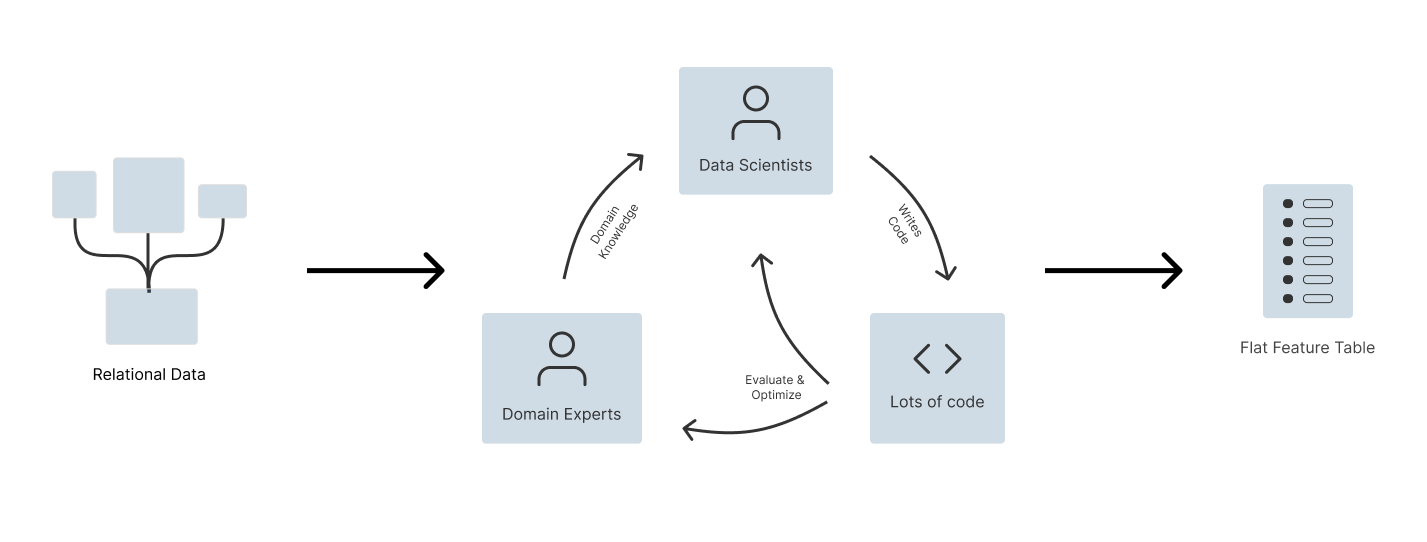

In this figure, we refer to *relational data*. Relational data is structured data that you would usually find in relational databases such as PostgreSQL, MySQL, MariaDB, BigQuery or Redshift. However, the same holds true for time series. In fact, time series can be considered a special case of relational data. Below, we will see why that is.

### Interesting Features for Time Series

Two important characteristics are *trend* and *seasonality*.

- The *trend* indicates whether your time series increases or decreases over time.

- The *seasonality* indicates any patterns that vary by hour, day etc. For instance, the Interstate 94 dataset has very obvious seasonal patterns: Traffic volume is highest in the morning (when people drive to work) and in the evening (when people get home from work), very low at night and overall lower on weekends.

But there are many other important characteristics, such as the *average*, *median*, *max*, *min* and *standard deviation* of your observations over time. So when you build features for time series, a very common approach is to use a *sliding window* technique. Whenever you want to make a prediction you take all the values over a fixed period of time right up to when you want to make the prediction and then apply all sorts of aggregations to this. For classification tasks, every window or time point is classified by a certain label.

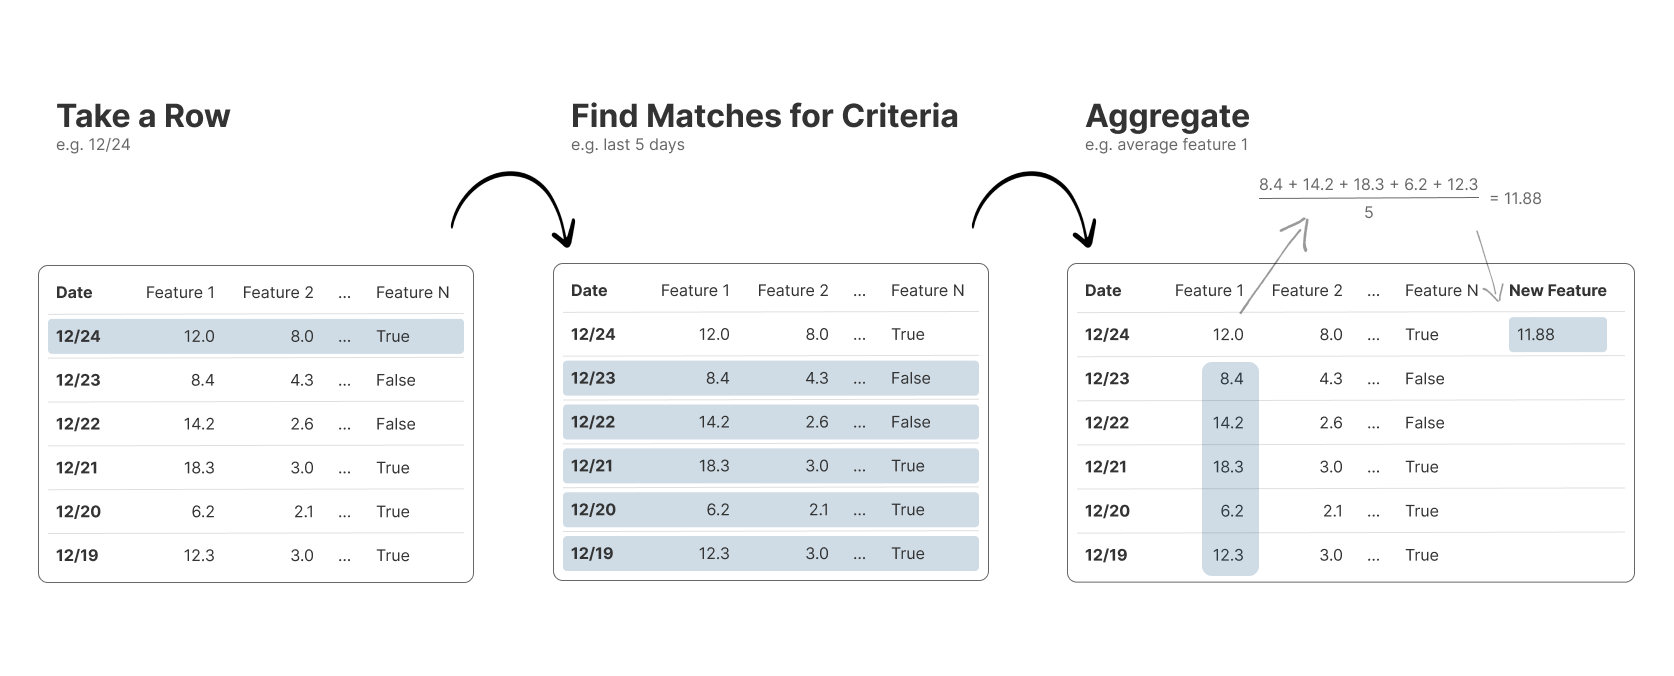

This depiction shows how we can engineer a very simple feature for a time series. As we would for relational data, we define some kind of criterion over which we identify the data we are interested in (in this case, the last five days), which we then aggregate using some aggregation function (in this case, the average). This is a very simple example how feature engineering for time series usually works. But if you engineer features for time series in this way, you are effectively thinking of time series as relational data: You are identifying relevant data from your data set and aggregating it, just like you would for relational data. In fact, what we are doing is effectively a *self join*, because we are joining a table to itself.

This is just a simple example. But there are many more features you can generate. For instance, for the EEG data, you build features like this:

- Average EEG value in the last second
- Maximum EEG value in the last second
- Minimum EEG value in the last second
- Median EEG value in the last second
- First measurement of EEG value in the last second
- Last measurement of EEG value in the last second
- Variance of the EEG value in the last second
- Standard deviation of the EEG value in the last second
- Exponentially weighted moving average of the EEG value in the last second
- 1%-quantile of the EEG value in the last second
- 5%-quantile of the EEG value in the last second
- ...

Of course, we mustn't just assume that one second is the right period of time to use. So we could take all of these features and calculate them for the last minute or last three hours.

Moreover, the features we have discussed so far don't really take seasonality into account (with the exception of first measurement of EEG value in the last second, because this is the measurement from exactly one second ago).

On the other hand, the Interstate 94 dataset is strongly seasonal, we should take that into account as well. So we could calculate features like this:

- Average traffic volume in the last four weeks, but only where weekday equals the weekday the point in time we want to predict.
- Average traffic volume in the last four weeks, but only where hour of the day equals the hour of the point in time we want to predict.
- Average traffic volume in the last four weeks, but only where both the weekday and the hour of the day equal the point in time we want to predict.
- Maximum traffic volume in the last four weeks, but only where weekday equals the weekday the point in time we want to predict.
- ...

What should be very obvious at this point is that there are *many* features that you can generate like this, even for a very simple time series problem. When you have a multivariate time series (meaning you have more than one input variable), you can apply these techniques to every single column in your input data and you will get many, many features. You would very likely have to apply some kind of feature selection techniques to focus on the most useful features.

The beauty of this approach is that it is very flexible and uses few assumptions. We have noted above that many time series are *not* equally-spaced. This would be a problem for classical time series analyses like ARIMA or ARMA. Not here. Nothing about this approach makes any assumptions about the spacing. 

### Automated Feature Engineering for Time Series

You will find a lot of examples where people conduct this work manually (mainly using pandas). But today, we are not limited to manual feature engineering. There are numerous tools and libraries which can automate away this kind of work.

Unfortunately, automated feature engineering has been getting a bit of a bad rap, mainly for taking too long. And it isn't wrong: Some of the more well-known libraries like featuretools or tsfresh are slow and not very memory-efficient.

Overall, the features extracted from time series by such libraries are quite similar [[Henderson & Fulcher](https://ieeexplore.ieee.org/document/9679937)]. However, the stark differences in terms of runtime and memory consumption make it worthwhile taking a closer look as some of the newer tools and libraries like getML or tsflex are highly optimized and can generate many features in a short period of time. 

In the following, we would like to introduce time series classification using the getML Pyhon API. Above, we have discussed how time series can be seen as a form of relational data and introduced the term relational learning. We can utilize a very simple relational learning approach by interpreting the time series as a form of relational data and conduct a self join.

### An Introduction to Univariate Time Series Classification with getML

In this tutorial, you will learn how to use getML to classify univariate time series. We first explore the data and learn what we are dealing with. Subsequently, we demonstrate how to efficiently build a full fledged machine learning data model and how to use getML's automatic feature learning algorithm FastProp.

### About the Dataset
The original dataset from the reference comprises 500 files, each file representing a single person/subject. Each recording contains the EEG signal value of brain activity for 23.6s sampled into 4096 data points. These recordings have been split into 1s windows. This results in 23 x 500 = 11500 windows of EEG data over time in 178 datapoints and each window is categorized into 5 labels:

1. Seizure activity
2. EEG recorded at tumor site
3. EEG recorded in healthy brain area
4. eyes closed during recording
5. eyes open during recording

Subjects labeled with classes 2-5 did not have epileptic seizures. We can thus do a binary classification of subjects suffering an epileptic seizure or not, meaning classes 1 or 0, respectively.

### Acknowledgements
Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907

## Setup

### Start up getML

First, we import the necessary libraries  and launch the [getML engine](https://getml.com/latest/user_guide/concepts/getml_suite/#engine-concepts). The engine runs in the background and takes care of all the heavy lifting for you. This includes things like our powerful database engine and efficient algorithms as well as the [getML monitor](https://getml.com/latest/user_guide/concepts/getml_suite/#monitor-concepts), which you can access by pointing your browser to http://localhost:1709/#/

In [1]:
%pip install -q "getml==1.5.0" "numpy<2.0.0" "matplotlib~=3.9" "seaborn~=0.13"


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import getml

All your work is organized into [projects](https://getml.com/latest/user_guide/concepts/project_management). You can easily set any name for your current project. The engine will create a new project or use an existing one if the project name already exists. It will also provide you with a direct link to the project within the monitor.

In [3]:
getml.engine.launch()
getml.engine.set_project("epilepsy_recognition")

Launching ./getML --allow-push-notifications=true --allow-remote-ips=false --home-directory=/home/user/.local/share/hatch/env/virtual/getml-demo/txflr3_Z/getml-demo/lib/python3.10/site-packages/getml --in-memory=true --install=false --launch-browser=true --log=false in /home/user/.local/share/hatch/env/virtual/getml-demo/txflr3_Z/getml-demo/lib/python3.10/site-packages/getml/.getML/getml-1.4.0-x64-community-edition-linux...
Launched the getML engine. The log output will be stored in /home/user/.getML/logs/20240826151418.log.
Loading pipelines... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          

Connected to project 'epilepsy_recognition'


You can manage your projects conveniently through the monitor web interface or directly using Python commands. For example, you can suspend your current project to free resources using [`getml.project.suspend()`](https://getml.com/latest/reference/project/#getml.project.attrs.suspend), switch to another project on the fly using [`getml.project.switch('new project name')`](https://getml.com/latest/reference/project/#getml.project.attrs.switch), or restart using [`getml.project.restart()`](https://getml.com/latest/reference/project/#getml.project.attrs.restart) should something go wrong. You can even save your current project to disk using [`getml.project.save('filename')`](https://getml.com/latest/reference/project/#getml.project.attrs.save) and load it with [`getml.project.load('filename')`](https://getml.com/latest/reference/project/#getml.project.attrs.load).

### Load Data

The original dataset was hosted on the [UCI repository](https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) but was unfortunately removed. You can get the dataset via Kaggle, [here](https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition).

The dataset we will be working on is stored in a CSV file located on disk. As we will perform data exploration, we will first load the data into a pandas DataFrame, as usual, and examine the raw data.

In [4]:
data = pd.read_csv("data/Epileptic Seizure Recognition.csv")

# view first 5 rows of the data
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


The first column contains extraneous metadata and can be dropped. The last column is named `y` and contains the class labels. As described above, we will do a binary classification into epileptic seizure (label 1) or not (label 2-5). Thus, we can set the labels 2-5 to 0, representing a non-epileptic instance, and 1 for epileptic seizure.

In [5]:
data.drop("Unnamed", axis=1, inplace=True)

In [6]:
# classify having epileptic seizure or not
class_relabeling = {1: 1, 2: 0, 3: 0, 4: 0, 5: 0}
data.replace({"y": class_relabeling}, inplace=True)

Now we can check which values we have in the label column and the DataFrame in general.

In [7]:
counts = data["y"].value_counts()
print(f"Number of records epileptic {counts[1]} vs non-epileptic {counts[0]}")

Number of records epileptic 2300 vs non-epileptic 9200


In [8]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


### Explore Data

We first have a look at some common statistics of our data divided into both classes.

In [9]:
# describe non-epileptic data
data[data["y"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [10]:
# describe epileptic data
data[data["y"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


The data in its current form is cumbersome to work with, both for data exploration and for applying machine learning later on. Thus, we reshape our data into a more compliant form.

First, we reshape our data from its pivoted form into a well-structured table using pandas' [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) function. The original index represents each sample, so we preserve it as the `sample_index`. We then extract the number from the `X` column names, which represents a timestamp (we call it `time_index` here) along each window. Finally, we sort the resulting DataFrame so we have a nicely structured table containing each window and corresponding metadata.

In [11]:
# data is in 1s per row format
# first unpivot into single time series, preserve target y, then take the original index, which is the
# "sample index" of each sample
data_unpivoted = (
    data.melt(
        id_vars=["y"], var_name="time_label", value_name="eeg", ignore_index=False
    )
    .reset_index()
    .rename(columns={"index": "sample_index"})
)

# the time index is the index over the 1s time period in each original row in data
data_unpivoted["time_index"] = (
    data_unpivoted["time_label"].str.extract(r"(\d+)", expand=False).astype(int)
)

# sort each window according to the sample and time and re-order columns
data_unpivoted = data_unpivoted.sort_values(by=["sample_index", "time_index"]).reindex(
    ["sample_index", "time_index", "eeg", "y"], axis=1
)

Let's have a look at our new DataFrame and the first recording.

In [12]:
data_unpivoted

,sample_index,time_index,eeg,y
0,0,1,135,0
11500,0,2,190,0
23000,0,3,229,0
34500,0,4,223,0
46000,0,5,192,0
...,...,...,...,...
2000999,11499,174,5,0
2012499,11499,175,4,0
2023999,11499,176,-2,0
2035499,11499,177,2,0


In [13]:
data_unpivoted[data_unpivoted["sample_index"] == 0]

,sample_index,time_index,eeg,y
0,0,1,135,0
11500,0,2,190,0
23000,0,3,229,0
34500,0,4,223,0
46000,0,5,192,0
...,...,...,...,...
1989500,0,174,-103,0
2001000,0,175,-127,0
2012500,0,176,-116,0
2024000,0,177,-83,0


We then can have a look at some of the EEG signals and get a feel for what we are dealing with. We pick the first `n` (we chose 5, use any number you like) samples of every class and plot the EEG signals side-by-side. 

In [14]:
n = 5

index_n_epileptic = data_unpivoted[data_unpivoted["y"] == 1]["sample_index"].unique()[
    :n
]
index_n_nonepileptic = data_unpivoted[data_unpivoted["y"] == 0][
    "sample_index"
].unique()[:n]

samples_to_show = np.concatenate((index_n_epileptic, index_n_nonepileptic))

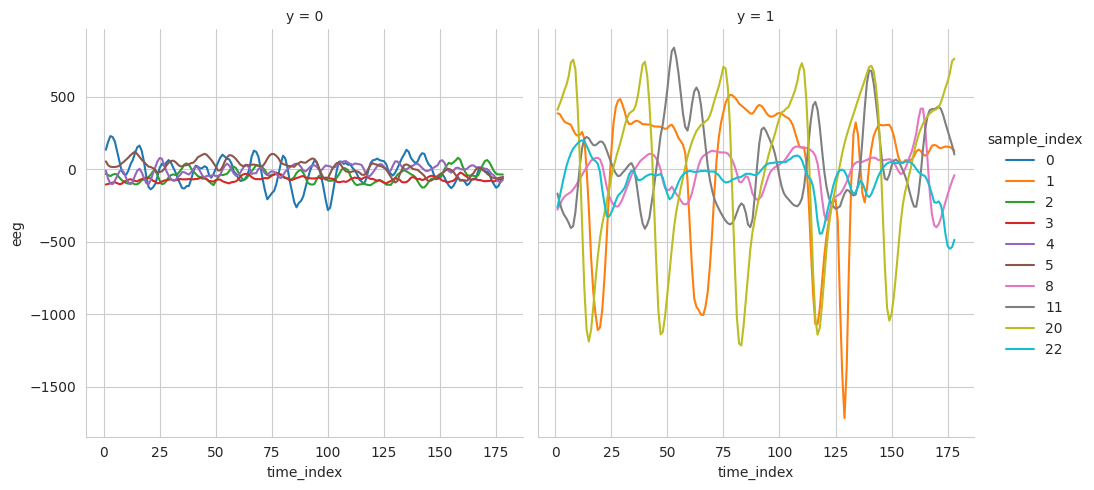

In [15]:
g = sns.relplot(
    data=data_unpivoted[data_unpivoted["sample_index"].isin(samples_to_show)],
    kind="line",
    x="time_index",
    y="eeg",
    col="y",
    hue="sample_index",
    legend="full",
    palette=sns.color_palette(),
)

We can already guess that epileptic signals seem to be a lot more deviating than non-epileptic signals. Let's have a look at the standard deviation of EEG values per class label and compare them:

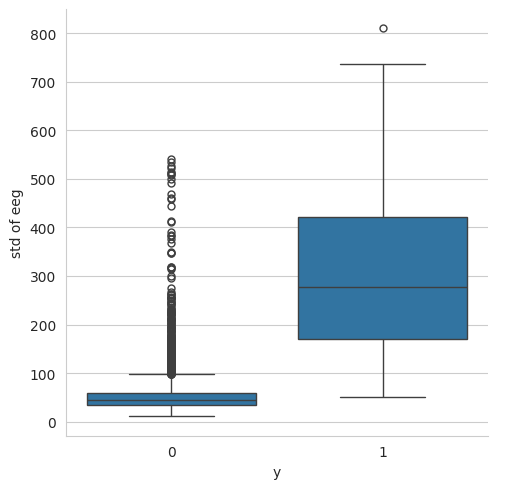

In [16]:
g = sns.catplot(
    data=data_unpivoted.groupby(["sample_index", "y"]).std().reset_index(),
    kind="box",
    x="y",
    y="eeg",
)
g.set_ylabels("std of eeg")

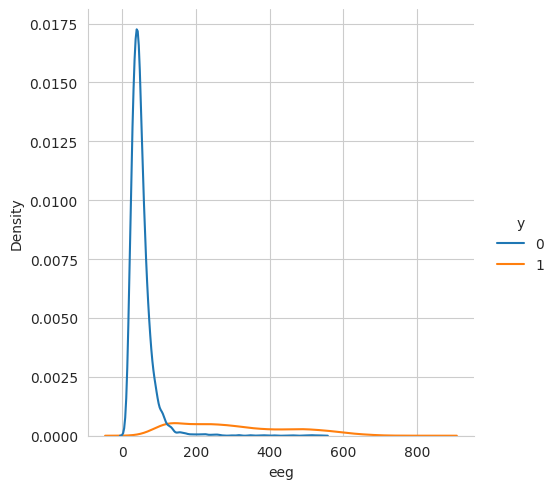

In [17]:
sns.displot(
    data=data_unpivoted.groupby(["sample_index", "y"]).std().reset_index(),
    kind="kde",
    x="eeg",
    hue="y",
)

At this point, it is fairly obvious that standard deviation is going to be a major feature in this analysis.

## Creating a GetML Data Model

Now that we have explored our data, let's do some machine learning. GetML uses a highly sophisticated engine that runs in the background and takes away a lot of hassle in machine learning applications. 

Let's take a look at loading data into your getML project. First, let's learn how we work with data in getML. Data is represented by getML's custom [DataFrame](https://getml.com/latest/reference/data/data_frame) that behaves similarly to a pandas DataFrame. However, a [getML.DataFrame](https://getml.com/latest/reference/data/data_frame) is a representation of our data inside getML's highly efficient C++ database engine that runs in the background. We can [load data](https://getml.com/latest/user_guide/concepts/importing_data) from various sources such as pandas DataFrames ([`getml.DataFrame.from_pandas`](https://getml.com/latest/reference/data/data_frame/#getml.data.DataFrame.from_pandas)), from CSV files ([`getml.DataFrame.from_csv`](https://getml.com/latest/reference/data/data_frame/#getml.data.DataFrame.from_csv)), or load from remote databases ([`getml.DataFrame.from_db`](https://getml.com/latest/reference/data/data_frame/#getml.data.DataFrame.from_db)) or even S3 buckets ([`getml.DataFrame.from_s3`](https://getml.com/latest/reference/data/data_frame/#getml.data.DataFrame.from_s3)).

Let's create a population DataFrame that contains our main goal: classify a 1s window. This means that we only need a DataFrame that holds the class labels of each window and a unique id, which in this case can just be the `sample_index`.

### The getML DataFrames

In [18]:
population_df = pd.DataFrame(
    {
        "sample_index": data.index.values,
        "y": data.y,
    }
)

In [19]:
population_df

,sample_index,y
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
11495,11495,0
11496,11496,1
11497,11497,0
11498,11498,0


A getML.DataFrame can be created from a pandas DataFrame as follows. As this getML.DataFrame is a representation of data internally handled by the engine, we need to specify an internal name. DataFrames are represented by these names in the monitor.

In [20]:
population = getml.DataFrame.from_pandas(population_df, name="population")

In [21]:
population

name,sample_index,y
role,unused_float,unused_float
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
,...,...
11495,11495,0
11496,11496,1
11497,11497,0


As you can see, our data is now stored inside the engine and represented by a getML.DataFrame (data is of course the same). The Python API provides a link to the getML.DataFrame in the monitor, where you can conveniently explore your data.

Now we need to [annotate our data](https://getml.com/latest/user_guide/concepts/annotating_data) so the engine knows what to do with it.

A key aspect of using getML.DataFrame are [roles](https://getml.com/latest/reference/data/roles_obj). Every column with relevant data to our data model needs to have a certain role specified. As you can see, both of our columns have the `unused_float` role for now. One of the most important roles is [`getml.data.roles.target`](https://getml.com/latest/reference/data/roles/#getml.data.roles.target), specifying that the data in this column is our target variable, the value that we want to train our machine learning model on. In our case, the column `y` containing the class label is our target. Let's tell the engine exactly that:

In [22]:
population.set_role(["y"], getml.data.roles.target)

As you may have noticed, our population getML.DataFrame does not contain any actual data, specifically no EEG signals. We utilize one of getML's core strengths here: relational data and time-series.

Our data can in fact be interpreted as a relational time-series. We have a label for each window with a unique window id (`sample_index`) that stands in relation to its actual data, the corresponding EEG signal of each individual window. Each window has the EEG signal values along with the unique window id (`sample_index`). In other words: we can utilize a very efficient data model by joining a peripheral table containing the EEG values onto the window labels.

Thus, the next step is to specify the `sample_index` as the join key using `getml.data.roles.join_key` in our population table:

In [23]:
population.set_role(["sample_index"], getml.data.roles.join_key)

In [24]:
population

name,sample_index,y
role,join_key,target
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
,...,...
11495,11495,0
11496,11496,1
11497,11497,0


We now create the peripheral table containing the time-series data corresponding to the 1s window labels in the population table just like we did previously with our population table:

In [25]:
peripheral = getml.DataFrame.from_pandas(data_unpivoted, name="peripheral")

Now we need to specify the column roles in the peripheral table. This getML.DataFrame contains the `sample_index` as well and we need to set it as our join key, as described above. Subsequently, as this table will contain our actual data in the form of EEG signal values, we specify the role of this column as numerical ([`getml.data.roles.numerical`](https://getml.com/latest/reference/data/roles/#getml.data.roles.numerical)), something we can train our machine learning model on:

In [26]:
peripheral.set_role(["sample_index"], getml.data.roles.join_key)
peripheral.set_role(["eeg"], getml.data.roles.numerical)

In [27]:
peripheral

name,sample_index,eeg,time_index,y
role,join_key,numerical,unused_float,unused_float
0,0,135,1,0
1,0,190,2,0
2,0,229,3,0
3,0,223,4,0
4,0,192,5,0
,...,...,...,...
2046995,11499,5,174,0
2046996,11499,4,175,0
2046997,11499,-2,176,0


As you may have noticed, there are still `unused_float` columns left. This data is present, but we do not use or need it in our machine learning efforts. This unused data is not considered and can just be ignored.

### The getML Data Model

Now that we have our data efficiently stored in getML.DataFrame, we continue to construct our data model.

This is very easily done by using one of getML's many [DataModels](https://getml.com/latest/user_guide/concepts/data_model). We put our time-series data in a relational context and can utilze for example a simple [StarSchema](https://getml.com/latest/reference/data/star_schema) data model to accomplish this. Easily put, we see our windows (the time-series data) as splits into many individual samples that are joined onto the window labels. This way, we are effectively thinking of time series as relational data: we are identifying relevant information from our data and aggragate it into a single label. In fact, what we are doing is effectively a self join, because we are joining a table to itself. This allows for very efficient calculation.


First, we define a random data [split](https://getml.com/latest/reference/data/split):

In [28]:
train, test = 0.9, 0.1

split = getml.data.split.random(seed=5849, train=train, test=test)

Second, we create our data model. We create a StarSchema containing our population getML.DataFrame as the population table and specify the split of our dataset into train and test set. We then [join](https://getml.com/latest/reference/data/star_schema/#getml.data.StarSchema.join) our peripheral table to our time series on the join key, in this case `sample_index`:

In [29]:
time_series = getml.data.StarSchema(population=population, split=split)

time_series.join(
    peripheral,
    on="sample_index",
)

getML provides a convenient view to our data model. We can look at a diagram representation of our data model with table names and specific joins, as well as the staging tables and statistics about the underlying data container.

In [30]:
time_series

data model

  population:
    columns:
    - sample_index: join_key
    - y: target

    joins:
    - right: 'peripheral'
      on: (population.sample_index, peripheral.sample_index)
      relationship: 'many-to-many'
      lagged_targets: False

  peripheral:
    columns:
    - sample_index: join_key
    - eeg: numerical
    - time_index: unused_float
    - y: unused_float


container

  population
      subset   name          rows   type
  0   test     population    1086   View
  1   train    population   10414   View

  peripheral
      name            rows   type     
  0   peripheral   2047000   DataFrame

This is an overview of your data model in the getML engine. At the top you can see a visual representation in the form of a diagram. Here you can easily see how your data and the specific joins is structured. Next you are presented the so called staging tables. This is a list of the relevant data frames and staging table names. At last, you can see an overview of all the data [containers](https://getml.com/latest/reference/data/container). This includes the split in train and test set of your population table as well as the peripheral tables.

In this simple example, the diagram consists of a single join of the peripheral table onto the population table via the `sample_index` as a join key. The population table is split into 90% train and 10% test set. The peripheral talbe contains all the EEG signal values and has over 2 million rows.

### The getML machine learning pipeline

Complex machine learning models are represented by getML [pipelines](https://getml.com/latest/reference/pipeline/pipeline). A pipeline contains the data model (including complex data relations), data [preprocessors](https://getml.com/latest/reference/preprocessors), [feature learners](https://getml.com/latest/reference/feature_learning), [predictors](https://getml.com/latest/reference/predictors) and so on.

In our approach, we will use getML's very own [FastProp](https://getml.com/latest/reference/feature_learning/fastboost) automatic feature learner for [feature engineering](https://getml.com/latest/user_guide/concepts/feature_engineering). We specify a loss function suitable for classification. As we are only dealing with a univariate time-series, we want to use all possible aggregation functions.

We use the highly efficient [XGBoost](https://getml.com/latest/reference/predictors/xgboost_classifier) classifier algorithm as a [predictor](https://getml.com/latest/user_guide/concepts/predicting).

In [31]:
feature_learner = getml.feature_learning.FastProp(
    loss_function=getml.feature_learning.loss_functions.CrossEntropyLoss,
    aggregation=getml.feature_learning.FastProp.agg_sets.All,
)

predictor = getml.predictors.XGBoostClassifier()

Now that we have our data model and machine learning components defined in just a few lines of code, we declare our machine learning pipeline as simple as the following. For convenience, we specify some free to choose tags. These are shown in the monitor and can be used to efficiently and easily distinguish different pipelines and their performance.

In [32]:
pipe = getml.pipeline.Pipeline(
    data_model=time_series.data_model,
    tags=["FastProp+AggAll", "XGBoost", f"split={train}/{test}"],
    feature_learners=[feature_learner],
    predictors=[predictor],
)

Now all we need to do is train our model:

In [33]:
pipe.fit(time_series.train, check=False)

Staging... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          
FastProp: Trying 25 features... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          
FastProp: Building features... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          
XGBoost: Training as predictor... 100% |██████████| [elapsed: 00:01, remaining: 00:00]          

Trained pipeline.
Time taken: 0h:0m:1.434615



Pipeline(data_model='population',
         feature_learners=['FastProp'],
         feature_selectors=[],
         include_categorical=False,
         loss_function='CrossEntropyLoss',
         peripheral=['peripheral'],
         predictors=['XGBoostClassifier'],
         preprocessors=[],
         share_selected_features=0.5,
         tags=['FastProp+AggAll', 'XGBoost', 'split=0.9/0.1', 'container-Mq37qh'])

This is all it takes. FastProp found features in just 1 second and XGBoost trained our model in just 2 seconds. The whole process took less than 4 seconds!

## Model Evaluation

Now, let's look at how well our model performs. Again, getML does everything for you. We [score](https://getml.com/latest/reference/pipeline/pipeline/#getml.pipeline.Pipeline.score) our pipeline on the test set:

In [34]:
pipe.score(time_series.test)

Staging... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          
Preprocessing... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          
FastProp: Building features... 100% |██████████| [elapsed: 00:00, remaining: 00:00]          



,date time,set used,target,accuracy,auc,cross entropy
0,2024-08-26 15:14:26,train,y,0.98,0.9974,0.05586
1,2024-08-26 15:14:26,test,y,0.9696,0.994,0.0793


Let's have a look at some key [machine learning metrics](https://getml.com/latest/reference/pipeline/scores_container): Accuracy and Area Under Curve (AUC):

In [35]:
print(f"Accuracy: {pipe.scores.accuracy*100:.2f}%, AUC: {pipe.scores.auc:.4f}")

Accuracy: 96.96%, AUC: 0.9940


There are several other, more complex metrics to understand the performance of a machine learning model. The most prominent being Receiver Operating Characteristic (ROC) curve, precision-recall curve and lift curve. getML has these already calculated for you:

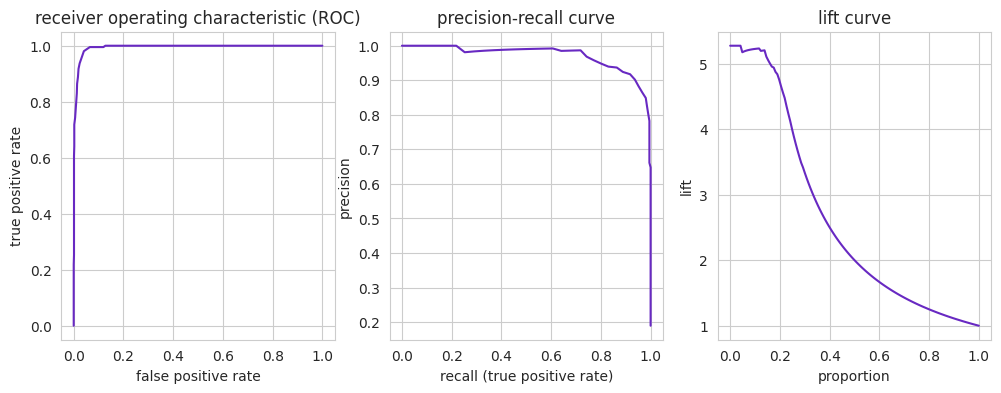

In [36]:
# Refers to the data from the last time we called .score(...)
fpr, tpr = pipe.plots.roc_curve()
recall, precision = pipe.plots.precision_recall_curve()
proportion, lift = pipe.plots.lift_curve()

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].plot(fpr, tpr, color="#6829c2")
ax[0].set_title("receiver operating characteristic (ROC)")
ax[0].set_xlabel("false positive rate")
ax[0].set_ylabel("true positive rate")

ax[1].plot(recall, precision, color="#6829c2")
ax[1].set_title("precision-recall curve")
ax[1].set_xlabel("recall (true positive rate)")
ax[1].set_ylabel("precision")

ax[2].plot(proportion, lift, color="#6829c2")
ax[2].set_title("lift curve")
ax[2].set_xlabel("proportion")
ax[2].set_ylabel("lift")

plt.show()

The Receiver-Operator-Characteristic (ROC) curve is a diagram that shows the diagnostic ability of a binary classifier for all classification thresholds. It shows the tradeoff between sensitivity (true positive rate or TPR) and specificity (1 - FPR or false positive rate). Easily put, the closer the curve to the top left (meaning the larger the area under curve or AUC) , the more accurate the classifier. A 45° diagonal would be a random classifier.

Much like the ROC curve, a precision-recall curve (PR curve) is used to evaluate the performance of a binary classifier. It is often used when dealing with heavily imbalanced classes. It is desired that your machine learning model has both high precision and high recall. However, we often end up with a trade-off between the two. Similar to a ROC curve, the higher the area und the curve the better performing our binary classifier.

The Lift curve shows the relation between the number of instances which were predicted positive and those that are indeed positive and thus, like ROC and PR curves, measures the effectiveness of a chosen classifier against a random classifier. In our example, the patients with the highest probability of having an epileptic seizure appear on the left of the Lift curve along with high Lift scores. This point is called the Maximum Lift Point: the higher this point, the better our model performs. Also, it is generally considered that the longer the flat part on the right of the Lift curve, the more reliable the model is.

All three performance diagrams measure the performance of a binary classifier against a random classifier. As a rule of thumb, the higher ROC and PR curves the better, while a Lift curve is desired to be high in the left and preferably flat on the right.

## Studying the Features

Finally, we can have a look at the features our relational learning algorithm has extracted. We can view them conveniently in the getML monitor under the respective pipeline, or print them directly in Python:

In [37]:
pipe.features

,target,name,correlation,importance
0,y,feature_1_1,0.0358,0.0087
1,y,feature_1_2,0.7295,0.018
2,y,feature_1_3,-0.7295,0.0
3,y,feature_1_4,0.7646,0.008
4,y,feature_1_5,0.0516,0.0041
,...,...,...,...
20,y,feature_1_21,0.7634,0.0012
21,y,feature_1_22,0.7615,0.0017
22,y,feature_1_23,0.0186,0.0189
23,y,feature_1_24,-0.0433,0.0026


We can look at feature correlations:

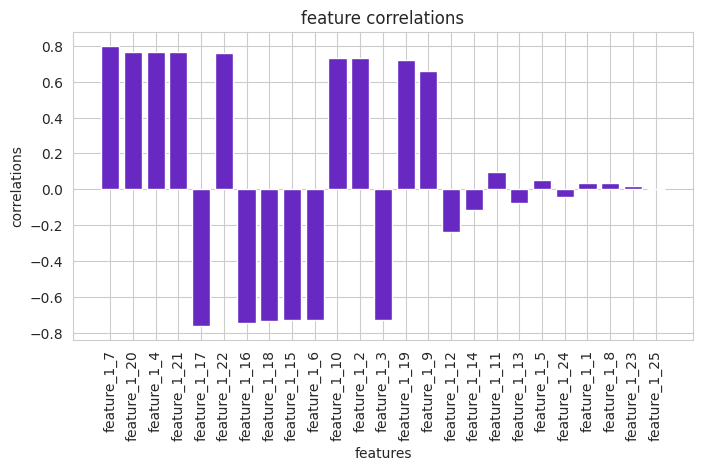

In [38]:
names, correlations = pipe.features.correlations()

plt.subplots(figsize=(8, 4))

plt.bar(names, correlations, color="#6829c2")

plt.title("feature correlations")
plt.xlabel("features")
plt.ylabel("correlations")
plt.xticks(rotation="vertical")

plt.show()

Or we can have a look at the feature importances. This is particularly interesting if we want to understand what generated features are most important for our machine learning model.

The feature importance is calculated by XGBoost based on the improvement of the optimizing criterium at each split in the decision tree and is normalized to 100%.

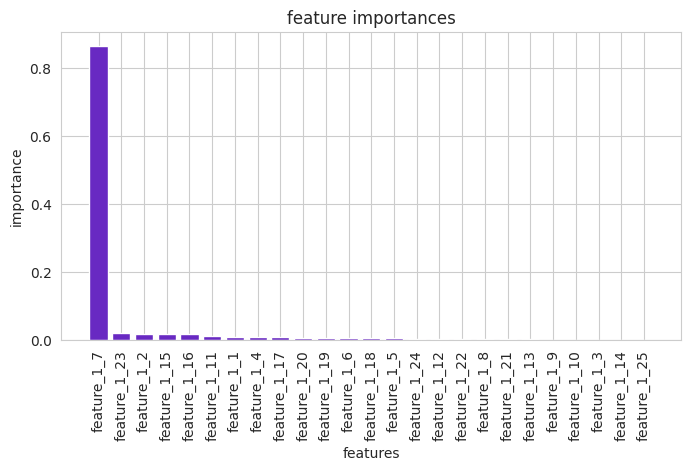

In [39]:
names, importances = pipe.features.importances()

plt.subplots(figsize=(8, 4))

plt.bar(names, importances, color="#6829c2")

plt.title("feature importances")
plt.xlabel("features")
plt.ylabel("importance")
plt.xticks(rotation="vertical")

plt.show()

This is intriguing! It seems that one particular feature stands out in its importance for classification predictions.

As we already discussed above, we view our time series data from a relation data point of view. In fact, relational learning is one of getML's core strengths. Particularly, getML is able to transpile features into database queries that can be used in production database environments without the need of any other software component.

Let's have a look at the SQL code of our most important feature:

In [40]:
pipe.features.to_sql()[names[0]]

```sql
DROP TABLE IF EXISTS "FEATURE_1_7";

CREATE TABLE "FEATURE_1_7" AS
SELECT STDDEV( t2."eeg" ) AS "feature_1_7",
       t1.rowid AS rownum
FROM "POPULATION__STAGING_TABLE_1" t1
INNER JOIN "PERIPHERAL__STAGING_TABLE_2" t2
ON t1."sample_index" = t2."sample_index"
GROUP BY t1.rowid;
```

As you can see, the most important feature in seizure recognition from EEG signals seems to be the standard deviation. Just like we guessed in the beginning of this notebook.

However, relevant features are by far not always so obvious as in this particular example dataset. In fact, most of the time feature engineering takes a lot of effort and domain knowledge from domain experts. As we discussed above, manual feature engineering is a cumbersome, time consuming and error prone process.

Novel machine learning libraries like getML with automatic feature learning, flexible data models and machine learning pipelines, all wrapped inside an easy to use Python API, backed by an efficient and fast C++ backend make this task a lot easier and way more efficient for data scientists. 